## Proposed statment : Customer Personality
We aim to gain insights into the behavioral patterns, preferences, and characteristics of customers. By analyzing various data sources such as demographic information, purchase history, and online interactions, this project seeks to identify distinct customer segments and understand their unique personalities. Through advanced analytics techniques and machine learning algorithms, it aims to provide valuable insights for businesses to tailor their marketing strategies, improve customer engagement, and enhance overall customer satisfaction.





## Imporintg important Libraries

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\PC\AppData\Local\Temp\ipykernel_11188\1153090890.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel('Marketing-Survey.xlsx')
df.head(10)

,ID,BIRTH-YEAR,EDU,STATUS,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,6862,1971,Graduation,Divorced,1730,0,0,18-05-2014,65,1,...,20,0,0,0,0,0,0,3,11,0
1,5376,1979,Graduation,Married,2447,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
2,11110,1973,Graduation,Single,3502,1,0,13-04-2013,56,2,...,14,0,0,0,0,0,0,3,11,0
3,9931,1963,PhD,Married,4023,1,1,23-06-2014,29,5,...,19,0,0,0,0,0,0,3,11,0
4,10311,1969,Graduation,Married,4428,0,1,05-10-2013,0,16,...,1,0,0,0,0,0,0,3,11,0
5,3955,1965,Graduation,Divorced,4861,0,0,22-06-2014,20,2,...,14,0,0,0,0,0,0,3,11,0
6,9303,1976,Graduation,Married,5305,0,1,30-07-2013,12,12,...,13,0,0,0,0,0,0,3,11,0
7,5899,1950,PhD,Together,5648,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0
8,4246,1982,Master,Single,6560,0,0,12-12-2013,2,67,...,17,0,0,0,0,0,0,3,11,0
9,4303,1957,PhD,Together,6835,0,1,08-12-2012,76,107,...,20,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis (EDA)

In [3]:
df.shape

(2202, 29)

- In this dataset, we have only three columns with object data type, while the remaining columns are numerical.

In [5]:
df.nunique()

ID                     2202
BIRTH-YEAR               55
EDU                       5
STATUS                    8
Income                 1962
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                771
MntFruits               158
MntMeatProducts         549
MntFishProducts         181
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

- In the preceding cell, the columns "Z_CostContact" and "Z_Revenue" contain constant values across all rows, indicating they provide no useful information for model building. Thus, we can safely drop these columns.

In [5]:
df.isna().any()

ID                     False
BIRTH-YEAR             False
EDU                    False
STATUS                 False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

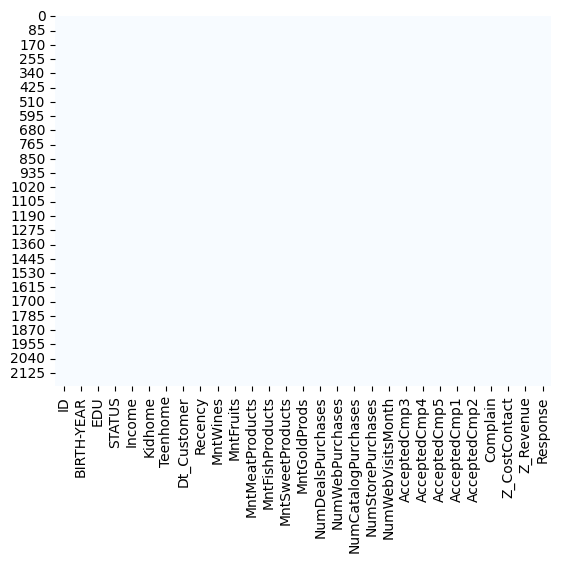

In [6]:
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)
plt.gca().set_facecolor('white')
plt.show()

### Let's analyze the number of complaints filed by customers and determine the proportion of positive and negative responses received over the past two years.

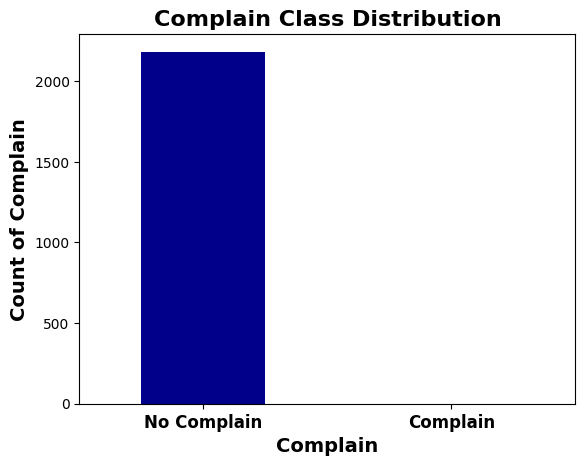

In [7]:
label_complain = ["No Complain", "Complain"]
count_complain = df['Complain'].value_counts()
count_complain.plot(kind='bar', rot=0, color=['darkblue', 'white'])
plt.title("Complain Class Distribution", fontsize=16, fontweight='bold')
plt.xticks(range(2), label_complain, fontsize=12, fontweight='bold')
plt.xlabel("Complain", fontsize=14, fontweight='bold')
plt.ylabel("Count of Complain", fontsize=14, fontweight='bold')
plt.gca().set_facecolor('white')
plt.show()

## Data Preprocssing 

-  Based on the chart above, it appears that there are relatively few complaints from customers compared to those who did not complain.

### ## Let's check the responses.

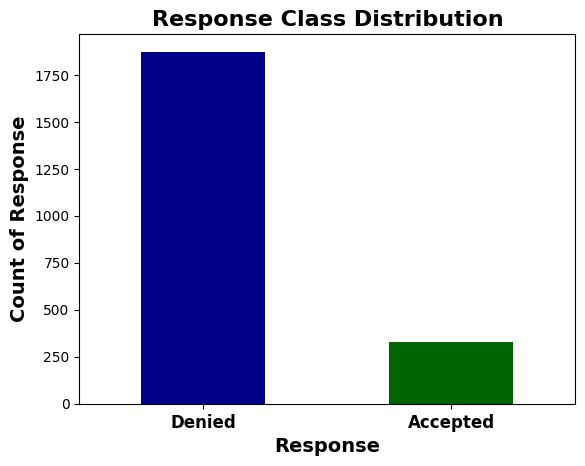

In [8]:
label_response = ["Denied", "Accepted"]
count_response = df['Response'].value_counts()
count_response.plot(kind='bar', rot=0, color=['darkblue', 'darkgreen'])
plt.title("Response Class Distribution", fontsize=16, fontweight='bold')
plt.xticks(range(2), label_response, fontsize=12, fontweight='bold')
plt.xlabel("Response", fontsize=14, fontweight='bold')
plt.ylabel("Count of Response", fontsize=14, fontweight='bold')
plt.show()

- This graph illustrates that the majority of customers have denied the offer in the last campaign.

## The next step is to check all offers in the campagin

- AcceptedCmp1: 
the key factor : 1 if customer accepted the offer.  0 if customer rejected the offer . 

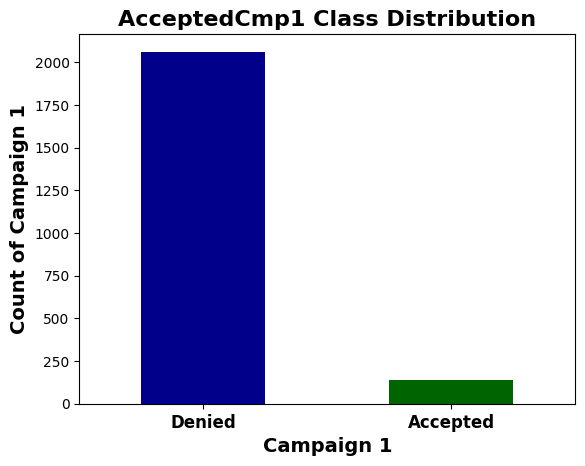

In [9]:
labels_c1 = ["Denied", "Accepted"]
count_c1 = df['AcceptedCmp1'].value_counts()
count_c1.plot(kind='bar', rot=0, color=['darkblue', 'darkgreen'])
plt.title("AcceptedCmp1 Class Distribution", fontsize=16, fontweight='bold')
plt.xticks(range(2), labels_c1, fontsize=12, fontweight='bold')
plt.xlabel("Campaign 1", fontsize=14, fontweight='bold')
plt.ylabel("Count of Campaign 1", fontsize=14, fontweight='bold')
plt.show()

- AcceptedCmp2: 
the key factor : 1 if customer accepted the offer.  0 if customer rejected the offer . 

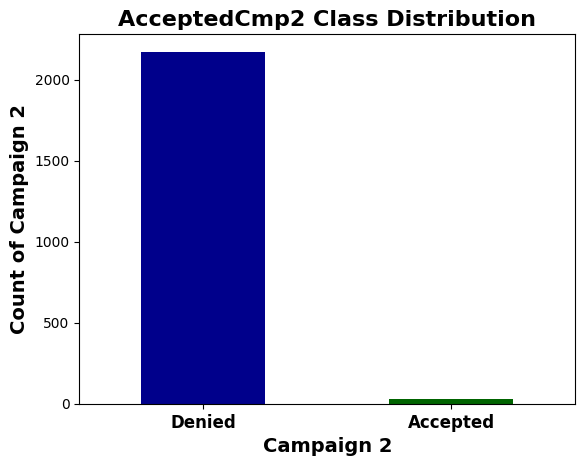

In [10]:
labels_c1 = ["Denied", "Accepted"]
count_c1 = df['AcceptedCmp2'].value_counts()
count_c1.plot(kind='bar', rot=0, color=['darkblue', 'darkgreen'])
plt.title("AcceptedCmp2 Class Distribution", fontsize=16, fontweight='bold')
plt.xticks(range(2), labels_c1, fontsize=12, fontweight='bold')
plt.xlabel("Campaign 2", fontsize=14, fontweight='bold')
plt.ylabel("Count of Campaign 2", fontsize=14, fontweight='bold')
plt.show()

- AcceptedCmp3: 
the key factor : 1 if customer accepted the offer.  0 if customer rejected the offer . 

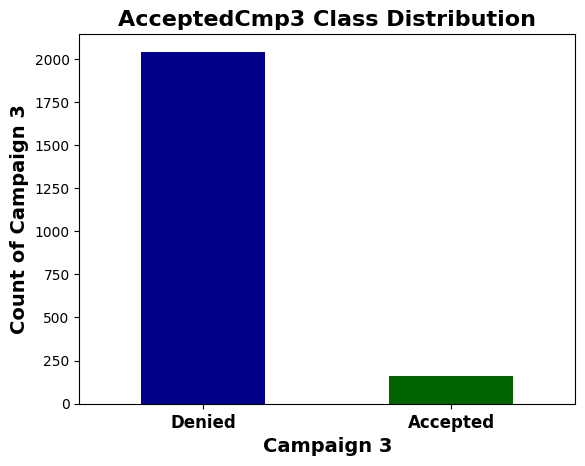

In [11]:
labels_c1 = ["Denied", "Accepted"]
count_c1 = df['AcceptedCmp3'].value_counts()
count_c1.plot(kind='bar', rot=0, color=['darkblue', 'darkgreen'])
plt.title("AcceptedCmp3 Class Distribution", fontsize=16, fontweight='bold')
plt.xticks(range(2), labels_c1, fontsize=12, fontweight='bold')
plt.xlabel("Campaign 3", fontsize=14, fontweight='bold')
plt.ylabel("Count of Campaign 3", fontsize=14, fontweight='bold')
plt.show()

- AcceptedCmp4: 
the key factor : 1 if customer accepted the offer.  0 if customer rejected the offer . 

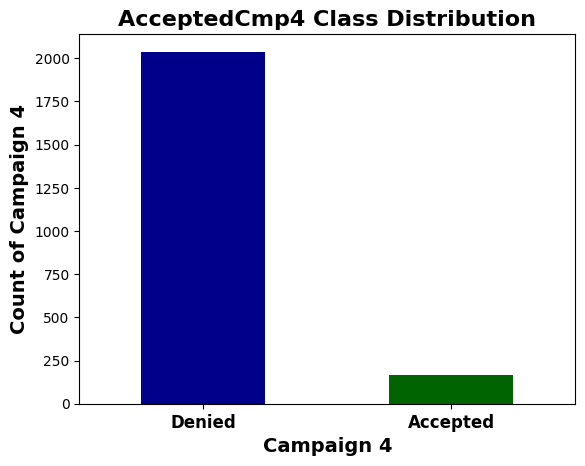

In [12]:
labels_c1 = ["Denied", "Accepted"]
count_c1 = df['AcceptedCmp4'].value_counts()
count_c1.plot(kind='bar', rot=0, color=['darkblue', 'darkgreen'])
plt.title("AcceptedCmp4 Class Distribution", fontsize=16, fontweight='bold')
plt.xticks(range(2), labels_c1, fontsize=12, fontweight='bold')
plt.xlabel("Campaign 4", fontsize=14, fontweight='bold')
plt.ylabel("Count of Campaign 4", fontsize=14, fontweight='bold')
plt.show()

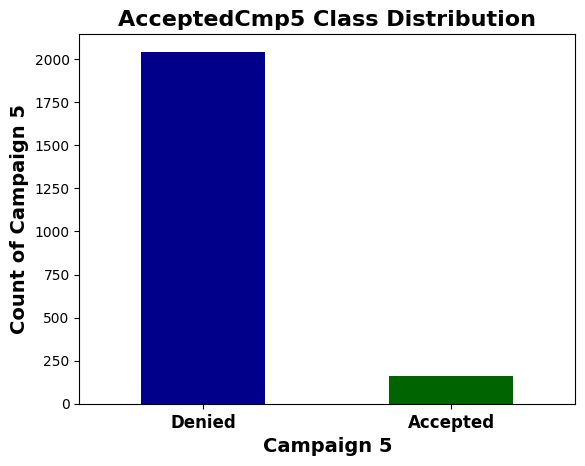

In [11]:
labels_c1 = ["Denied", "Accepted"]
count_c1 = df['AcceptedCmp5'].value_counts()
count_c1.plot(kind='bar', rot=0, color=['darkblue', 'darkgreen'])
plt.title("AcceptedCmp5 Class Distribution", fontsize=16, fontweight='bold')
plt.xticks(range(2), labels_c1, fontsize=12, fontweight='bold')
plt.xlabel("Campaign 5", fontsize=14, fontweight='bold')
plt.ylabel("Count of Campaign 5", fontsize=14, fontweight='bold')
plt.show()

In [12]:
df["AcceptedCmp1"].value_counts()

AcceptedCmp1
0    2062
1     140
Name: count, dtype: int64

In [13]:
df["AcceptedCmp2"].value_counts()

AcceptedCmp2
0    2172
1      30
Name: count, dtype: int64

In [14]:
df["AcceptedCmp3"].value_counts()

AcceptedCmp3
0    2041
1     161
Name: count, dtype: int64

In [15]:
df["AcceptedCmp4"].value_counts()

AcceptedCmp4
0    2038
1     164
Name: count, dtype: int64

In [16]:
df["AcceptedCmp5"].value_counts()


AcceptedCmp5
0    2043
1     159
Name: count, dtype: int64

- From the figures above, it's evident that the majority of offers have been denied by customers across all campaigns. However, Campaign 4 shows a notably higher level of acceptance compared to the other campaigns. The acceptance rates follow the order: Campaign 4 > Campaign 3 >  Campaign 5 > Campaign 1 > Campaign 2.

In [17]:
df['STATUS'].value_counts()

STATUS
Married     850
Together    573
Single      468
Divorced    229
Widow        75
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

- Let's divide the STATUS column into two main groups: Group one "relationship" including: Married, Together, Relationship, and group two "Single" including: Single, Widow, Alone, Yolo, Absurd.

In [18]:
df['STATUS'] = df['STATUS'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd','single'],'Single')
df['STATUS'] = df['STATUS'].replace(['Married', 'Together'],'relationship')


In [19]:
df['STATUS'].value_counts()

STATUS
relationship    1423
Single           779
Name: count, dtype: int64

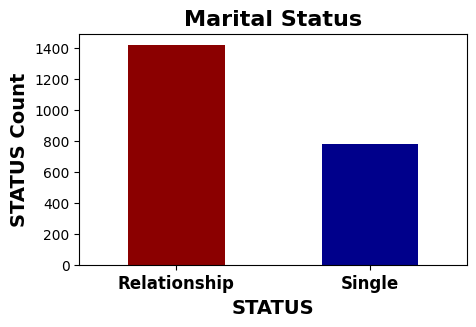

In [20]:
plt.figure(figsize=(5, 3))  # Adjust the width and height as needed
labels_status = ["Relationship", "Single"]
count_status = pd.Series(df['STATUS']).value_counts()
count_status.plot(kind='bar', rot=0, color=['darkred', 'darkblue'])
plt.title("Marital Status", fontsize=16, fontweight='bold')
plt.xticks(range(2), labels_status, fontsize=12, fontweight='bold')
plt.xlabel("STATUS", fontsize=14, fontweight='bold')
plt.ylabel("STATUS Count", fontsize=14, fontweight='bold')
plt.show()

### These lines of code calculate several new columns based on existing ones in the DataFrame df. Specifically:

df['Kids'] calculates the total number of kids by summing the 'Kidhome' and 'Teenhome' columns.
df['Expenses'] calculates the total expenses by summing the expenses from different product categories: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds'.
df['TotalAcceptedCmp'] calculates the total number of accepted campaign offers by summing the 'AcceptedCmp1' to 'AcceptedCmp5' columns and the 'Response' column.
df['NumTotalPurchases'] calculates the total number of purchases by summing the purchases from different channels: 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases'.





In [21]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [22]:
df.head()

,ID,BIRTH-YEAR,EDU,STATUS,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,6862,1971,Graduation,Single,1730,0,0,18-05-2014,65,1,...,0,0,0,3,11,0,0,8,0,15
1,5376,1979,Graduation,relationship,2447,1,0,06-01-2013,42,1,...,0,0,0,3,11,0,1,1730,0,43
2,11110,1973,Graduation,Single,3502,1,0,13-04-2013,56,2,...,0,0,0,3,11,0,1,5,0,0
3,9931,1963,PhD,relationship,4023,1,1,23-06-2014,29,5,...,0,0,0,3,11,0,2,9,0,15
4,10311,1969,Graduation,relationship,4428,0,1,05-10-2013,0,16,...,0,0,0,3,11,0,1,359,0,25


In [23]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,BIRTH-YEAR,EDU,STATUS,Income,Dt_Customer,Recency,Complain,Z_CostContact,Z_Revenue,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,6862,1971,Graduation,Single,1730,18-05-2014,65,0,3,11,0,8,0,15
1,5376,1979,Graduation,relationship,2447,06-01-2013,42,0,3,11,1,1730,0,43
2,11110,1973,Graduation,Single,3502,13-04-2013,56,0,3,11,1,5,0,0
3,9931,1963,PhD,relationship,4023,23-06-2014,29,0,3,11,2,9,0,15
4,10311,1969,Graduation,relationship,4428,05-10-2013,0,0,3,11,1,359,0,25


In [24]:
df['Age'] = 2015 - df['BIRTH-YEAR']

In [25]:
df['EDU'].value_counts()

EDU
Graduation    1114
PhD            474
Master         362
2n Cycle       198
Basic           54
Name: count, dtype: int64

In [26]:
df['EDU'] = df['EDU'].replace(['PhD','2n Cycle','Graduation', 'Master'],'P-G')  
df['EDU'] = df['EDU'].replace(['Basic'], 'U-G')

In [27]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df['first_day'])
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [28]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "BIRTH-YEAR", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2202, 11)

In [29]:
df.head()

,EDU,STATUS,Income,Z_CostContact,Z_Revenue,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,P-G,Single,1730,3,11,0,8,0,15,44,228
1,P-G,relationship,2447,3,11,1,1730,0,43,36,725
2,P-G,Single,3502,3,11,1,5,0,0,42,628
3,P-G,relationship,4023,3,11,2,9,0,15,52,192
4,P-G,relationship,4428,3,11,1,359,0,25,46,453


### Data Visualization

In [30]:
df


,EDU,STATUS,Income,Z_CostContact,Z_Revenue,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,P-G,Single,1730,3,11,0,8,0,15,44,228
1,P-G,relationship,2447,3,11,1,1730,0,43,36,725
2,P-G,Single,3502,3,11,1,5,0,0,42,628
3,P-G,relationship,4023,3,11,2,9,0,15,52,192
4,P-G,relationship,4428,3,11,1,359,0,25,46,453
...,...,...,...,...,...,...,...,...,...,...,...
2197,P-G,relationship,157243,3,11,1,1608,0,37,42,306
2198,P-G,relationship,157733,3,11,1,59,0,2,44,576
2199,P-G,relationship,160803,3,11,0,1717,0,44,33,880
2200,P-G,relationship,162397,3,11,2,107,0,1,39,577


In [31]:
fig = px.bar(df, x='STATUS', y='Expenses', color='EDU', 
             color_discrete_map={'EDU': 'darkgreen'},  
             template='plotly_white')  

# Show the plot
fig.show()

In [32]:
df.head()

,EDU,STATUS,Income,Z_CostContact,Z_Revenue,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,P-G,Single,1730,3,11,0,8,0,15,44,228
1,P-G,relationship,2447,3,11,1,1730,0,43,36,725
2,P-G,Single,3502,3,11,1,5,0,0,42,628
3,P-G,relationship,4023,3,11,2,9,0,15,52,192
4,P-G,relationship,4428,3,11,1,359,0,25,46,453


In [33]:
fig = px.histogram(df, x="Expenses", facet_row="EDU", template='plotly_white')
fig.show()

In [34]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "EDU",  template = 'plotly_white')
fig.show ()

In [35]:
df.head()


,EDU,STATUS,Income,Z_CostContact,Z_Revenue,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,P-G,Single,1730,3,11,0,8,0,15,44,228
1,P-G,relationship,2447,3,11,1,1730,0,43,36,725
2,P-G,Single,3502,3,11,1,5,0,0,42,628
3,P-G,relationship,4023,3,11,2,9,0,15,52,192
4,P-G,relationship,4428,3,11,1,359,0,25,46,453


In [46]:
fig = px.histogram (df, x = "Age",  facet_row = "STATUS",  template = 'plotly_white')
fig.show ()

In [47]:
fig = px.histogram (df, x = "Income",  facet_row = "STATUS",  template = 'plotly_white')
fig.show ()

In [36]:
fig = px.pie(df, names="STATUS", hole=0.6, template="gridon", color_discrete_sequence=['red', 'darkblue', 'darkgreen', 'black'])
fig.update_layout(width=600, height=400)
fig.show()

- Approximately 35% of customers are single, while the majority, accounting for about 64%, are in a relationship.The higher percentage of customers in a relationship may indicate that individuals in committed relationships are more likely to engage with the business, possibly due to shared purchasing decisions or joint activities.

In [37]:
fig = px.pie(df, names="EDU", hole=0.6, template="plotly_white", color_discrete_sequence=['red', 'darkblue', 'darkgreen', 'black'])
fig.update_layout(width=600, height=400)
fig.show()


- Over 97% of customers having a postgraduate (PG) background suggests that the target audience for this business is primarily composed of individuals with higher educational qualifications. This could imply that the products or services offered cater to a more educated demographic or that the business's marketing efforts are focused on reaching customers with advanced degrees. The smaller proportion of customers with undergraduate (UG) backgrounds, around 2%, might indicate either a deliberate targeting of a niche market or a potential area for the business to explore in terms of expanding its customer base.

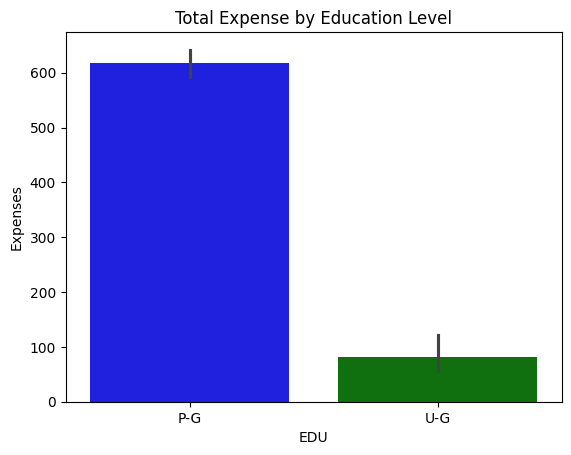

In [38]:
sns.barplot(x=df['EDU'], y=df['Expenses'], palette=['blue', 'green'])
plt.title('Total Expense by Education Level')
plt.show()

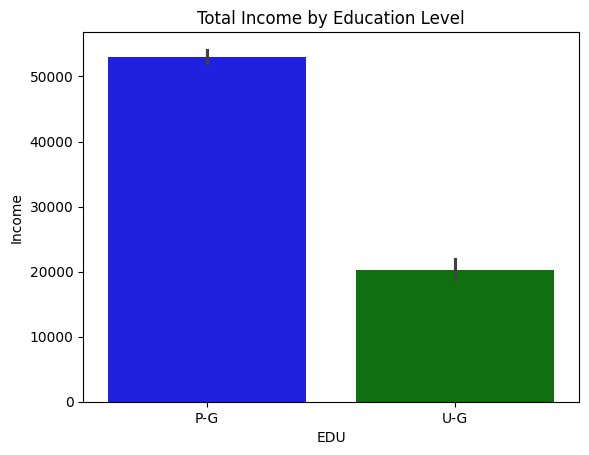

In [39]:
sns.barplot(x=df['EDU'], y=df['Income'], palette=['blue', 'green'])
plt.title('Total Income by Education Level')
plt.show()


In [40]:
obj = []
for i in df.columns:
    if(df[i].dtypes=="object"):
        obj.append(i)

print(obj)

['EDU', 'STATUS']


In [41]:
df['STATUS'].value_counts()

STATUS
relationship    1423
Single           779
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
lbl_encode = LabelEncoder()
for i in obj:
    df[i] = df[[i]].apply(lbl_encode.fit_transform)

In [44]:
df1 = df.copy()
df1.head()

,EDU,STATUS,Income,Z_CostContact,Z_Revenue,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0,0,1730,3,11,0,8,0,15,44,228
1,0,1,2447,3,11,1,1730,0,43,36,725
2,0,0,3502,3,11,1,5,0,0,42,628
3,0,1,4023,3,11,2,9,0,15,52,192
4,0,1,4428,3,11,1,359,0,25,46,453


# Silhouette Score

In [46]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

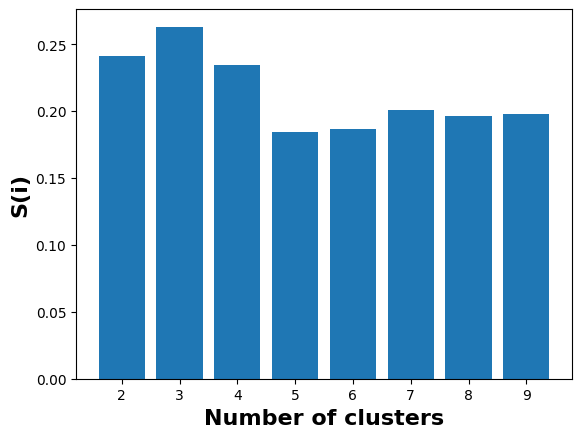

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features_df)
    score = silhouette_score(scaled_features_df, cluster_labels)
    silhouette_scores.append(score)
plt.bar(range(2, 10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize=16, fontweight='bold')
plt.ylabel('S(i)', fontsize=16, fontweight='bold')
plt.show()

In [50]:
silhouette_scores

[0.24143482761843704,
 0.26303538195939824,
 0.23444309665161453,
 0.18400803565230006,
 0.18635927901033442,
 0.20084215800041058,
 0.19644183804547716,
 0.19793324744714355]

In [51]:
sc = max(silhouette_scores)
num_of_clusters = silhouette_scores.index(sc)+2
print("Number of Cluster Required is: ", num_of_clusters)

Number of Cluster Required is:  3


## Model Building

In [52]:
kmeans = KMeans(n_clusters=num_of_clusters, random_state=42).fit(scaled_features_df)
pred = kmeans.predict(scaled_features_df)

In [53]:
pred

array([0, 1, 0, ..., 1, 0, 1])

In [54]:
df['cluster'] = pred + 1

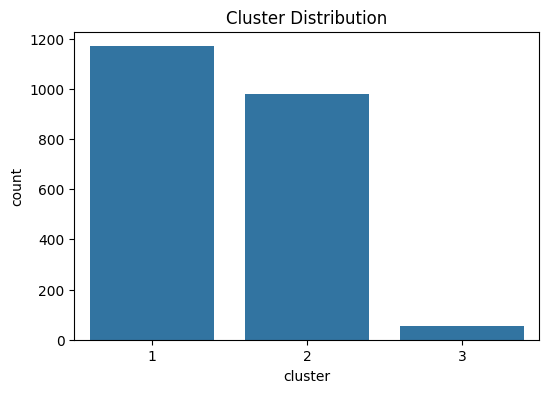

In [56]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["cluster"])
plt.title("Cluster Distribution")
plt.show()

### In this visualization, it's evident that the majority of customers are concentrated in cluster 1 compared to the other clusters.

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.


findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

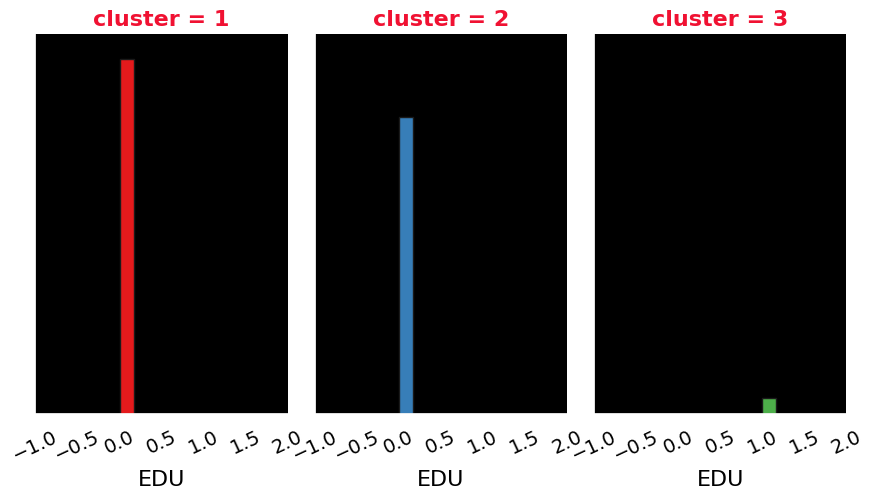

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

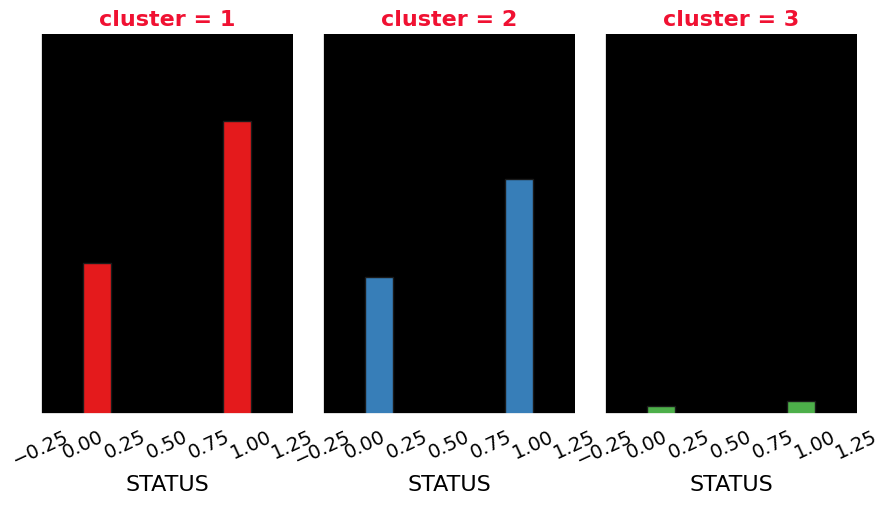

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

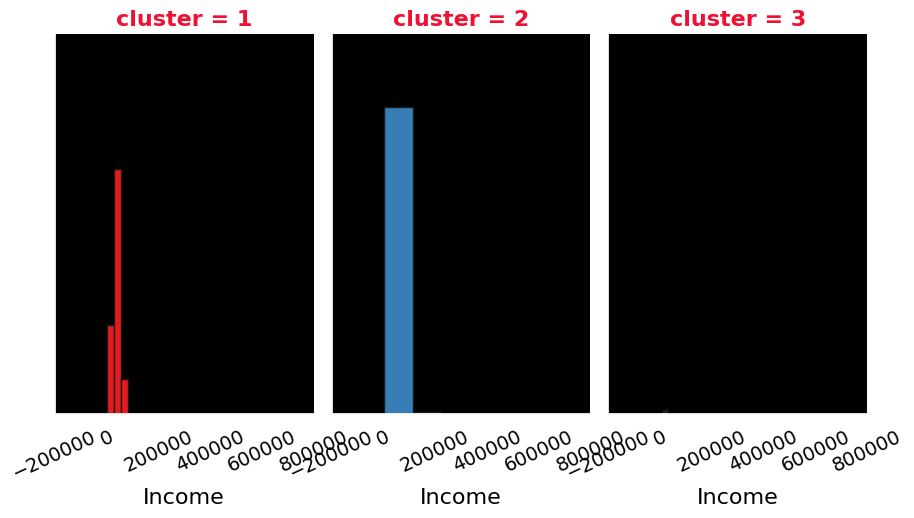

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

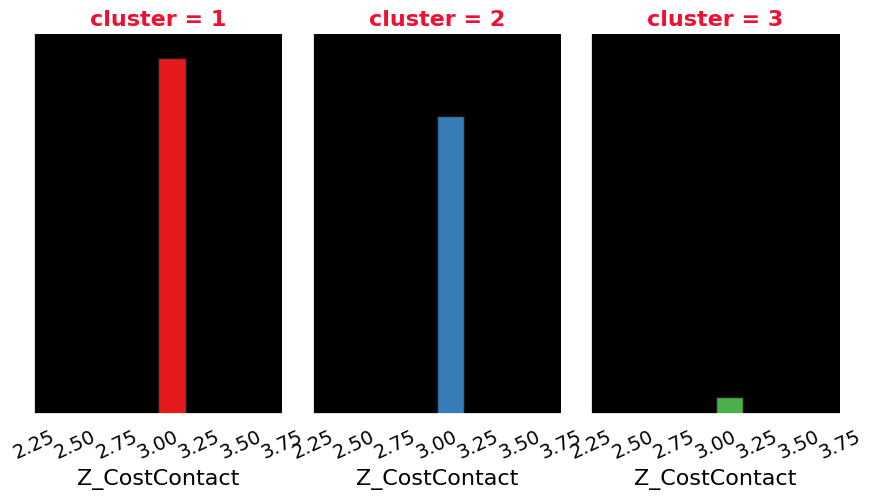

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

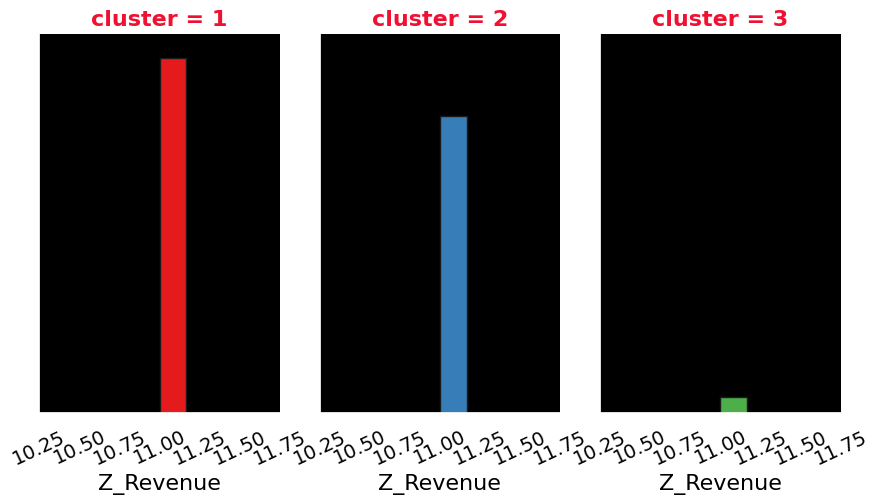

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

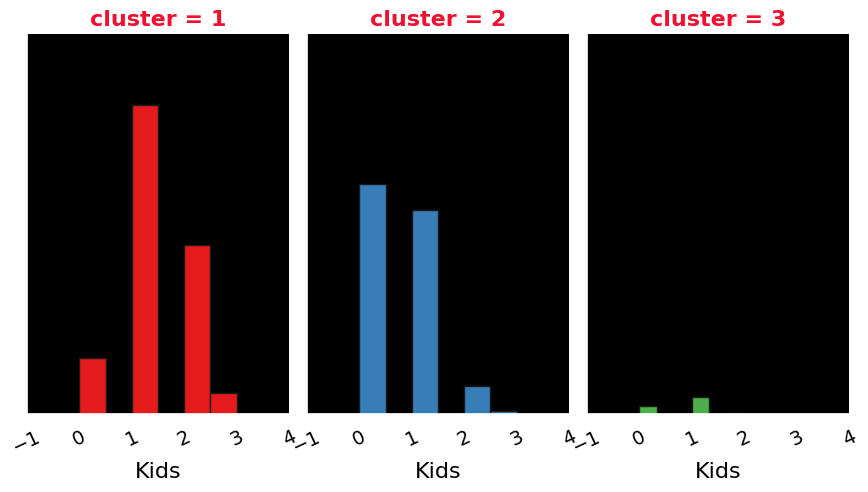

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

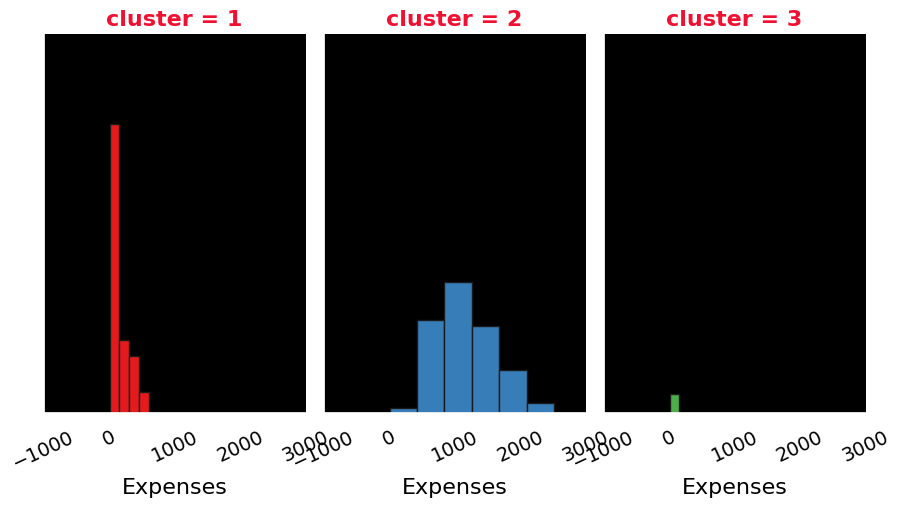

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

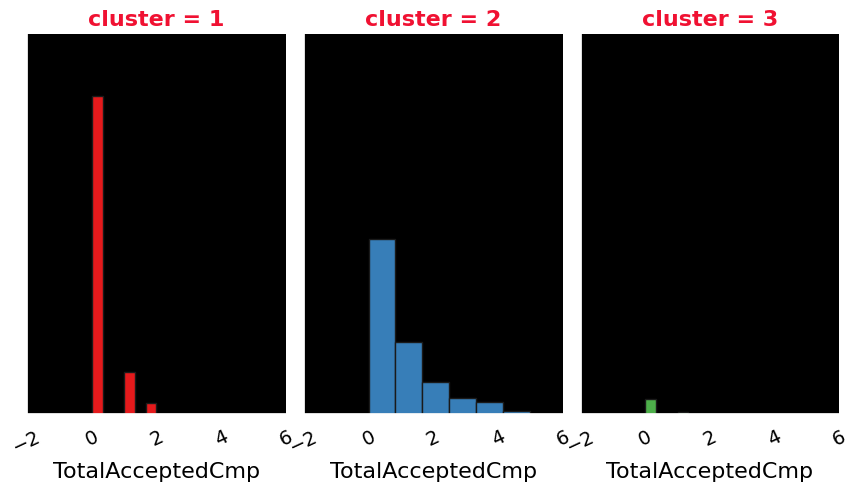

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

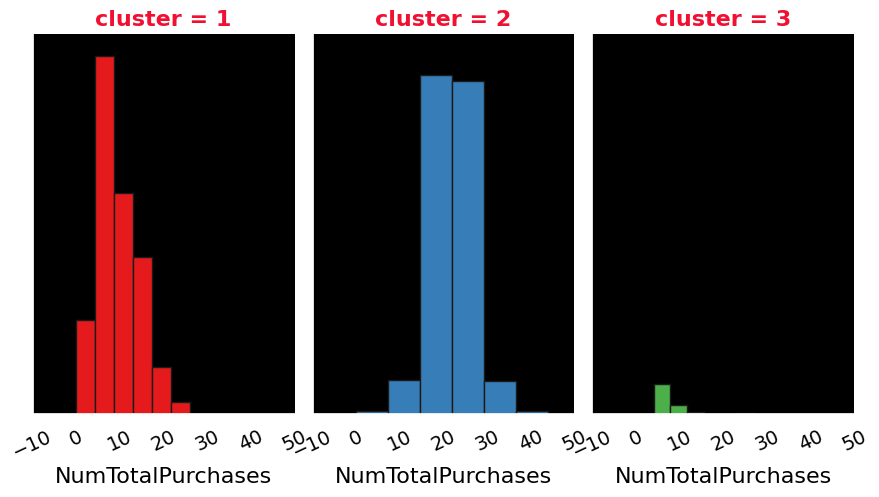

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

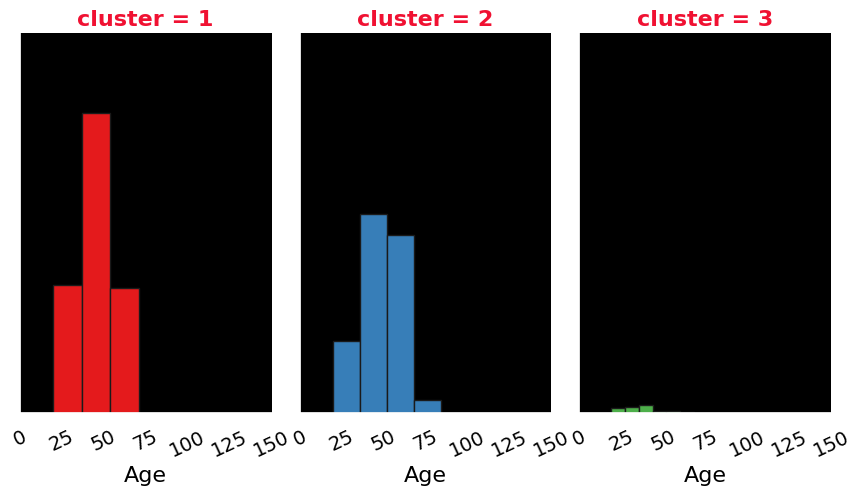

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

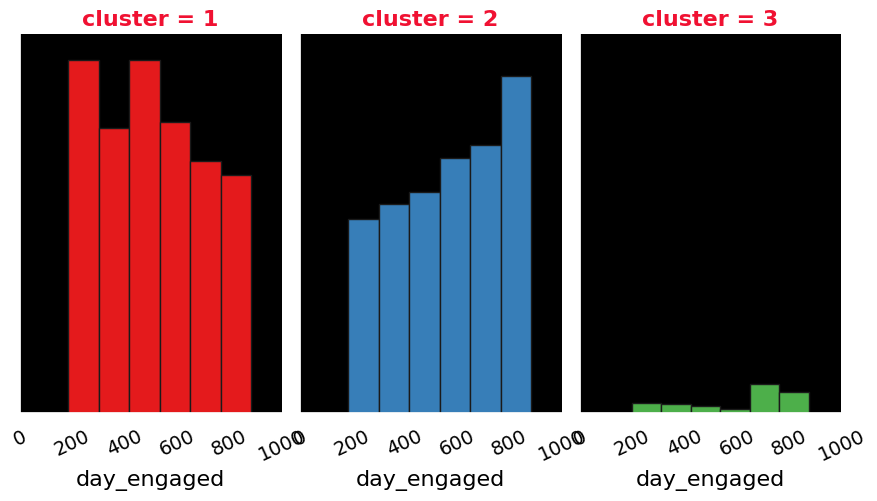

findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not found.
findfont: Font family 'Ubuntu' not

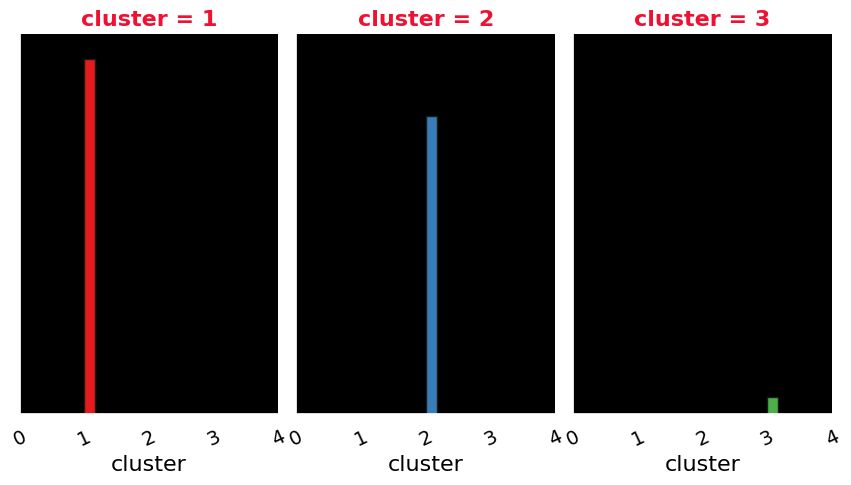

In [57]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df:
    diag = sns.FacetGrid(df, col="cluster", hue="cluster", palette="Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color='black', size=14)
    diag.set_yticklabels(color='black', size=14)
    diag.set_xlabels(color='black', size=16)
    diag.set_titles(color='#f01132', fontweight="bold", size=16)
    diag.figure.set_figheight(6)

### Final Report
Based on the information gathered from the clustering analysis, we can categorize customers into three distinct segments based on their activity levels:

1. Highly Active Customers:

These customers are predominantly classified into cluster one.
They exhibit high levels of engagement with the company's products and services.
Characteristics of Highly Active Customers:

Education: Most of the highly active customers have a postgraduate (PG) educational background.
Marital Status: The number of customers in a relationship is approximately double that of single customers.
Income: While their income is slightly lower compared to moderately active customers, they still demonstrate a significant level of purchasing power.
Kids: Highly active customers tend to have more children, with an average of around one child per customer.
Expenses: These customers tend to spend moderately, with average expenditures ranging from approximately 100 to 200 units of currency.
Age: The age range of highly active customers typically spans from 25 to 75 years old, with a peak between 40 to 50 years old.
Engagement Duration: Highly active customers exhibit high loyalty, engaging with the company for extended periods.

2. Moderately Active Customers:

These customers are mainly associated with cluster two.
They demonstrate moderate levels of engagement compared to highly active customers.
Characteristics of Moderately Active Customers:

Education: Similar to highly active customers, moderately active customers also have a postgraduate (PG) educational background.
Marital Status: The number of customers in a relationship is slightly higher than the number of single customers.
Income: Moderately active customers possess higher income levels compared to other segments, indicating greater purchasing capacity.
Kids: The presence of children among moderately active customers is lower, with many customers having no children.
Expenses: Moderately active customers tend to spend more than highly active customers, with average expenditures ranging from approximately 500 to 2000 units of currency.
Age: The age distribution of moderately active customers ranges from 25 to 75 years old, with a peak between 35 to 60 years old.
Engagement Duration: While engaged with the company, moderately active customers exhibit slightly less loyalty compared to highly active customers.





## THE END